# Problem 2: Logistic regression

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import random
from importlib import reload
import methods
methods = reload(methods)
from sklearn.datasets import load_svmlight_file
from methods import AccelPDA, UniAdaGrad, UniXGrad, AdaGrad

# Generating data
A, y = load_svmlight_file("datasets/breast-cancer_scale.txt")
A = A.toarray()
n = A.shape[0]
d = A.shape[1]
lambd = 0.1
# lambd = 1/n
r = 3
#for i in range(d): A[:,i] = (A[:,i]-np.mean(A[:,i]))/np.std(A[:,i])

L = 0.25 * np.max(la.eigvalsh(A.T @ A))/n + lambd

# Function for calculating cost
def cost(x):
    f = np.sum(np.log(1+np.exp(-np.dot(A, x) * y)))/n + (lambd/2)*np.sum(x**2)
    return f

def grad(x, random_ind):
    batch_size = len(random_ind)
    num = -y[random_ind]
    den = (1 + np.exp(np.dot(A[random_ind], x) * y[random_ind]))
    c = num/den
    c2 = np.dot(c.T,A[random_ind])
    final_grad = (c2)/(batch_size) + lambd * x
    return final_grad

x0 = np.zeros(d)
x_star = np.zeros(d)

# GD
K = 10000 #number of iterations
gamma = 1 / L
for k in range(K):
    x_star = x_star - gamma * grad(x_star, range(n))
    
print('norm_x_star: ', np.linalg.norm(x_star))
print('grad(x_star): ', grad(x_star, range(n)))

# Parameters for methods
D_AccelPDA = 2*r
D_UniXGrad = np.sqrt(2) * r
D_AdaGrad = 2*r
R = 4 * r**2 / d
x0 = np.zeros(d)
y0 = np.zeros(d)
f_star = cost(x_star)

norm_x_star:  1.0411162399927039
grad(x_star):  [ 4.16333634e-17  4.33680869e-19  2.16840434e-18 -1.30104261e-18
  1.73472348e-18 -5.20417043e-18  5.20417043e-18 -3.46944695e-18
  0.00000000e+00 -1.38777878e-17]


Mini-batch size: n

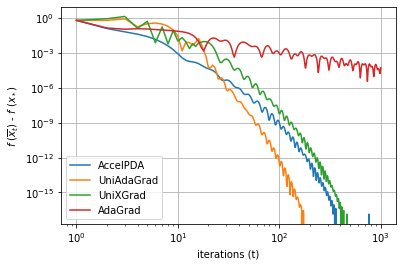

In [2]:
#Parameters
T = 1000
alpha = [i for i in range(T+2)]
t = [i+1 for i in range(T+1)]
eta = 0

#batches
batch_size = n
batch = []
for i in range(T+1): batch.append(random.sample(range(n), batch_size))

# Running the algorithms
x_aver_AccelPDA, f_AccelPDA = AccelPDA(cost, grad, x0, T, d, batch, alpha, D_AccelPDA, L, eta, r)
x_aver_UniAdaGrad, f_UniAdaGrad = UniAdaGrad(cost, grad, x0, T, d, batch, alpha, r, R)
x_aver_AdaGrad, f_AdaGrad = AdaGrad(cost, grad, x0, T, d, batch, D_AdaGrad, r)
x_aver_UniXGrad, f_UniXGrad = UniXGrad(cost, grad, y0, T, d, batch, alpha, r, D_UniXGrad)

# Plotting
plt.loglog(t, f_AccelPDA - f_star, label='AccelPDA')
plt.loglog(t, f_UniAdaGrad - f_star, label='UniAdaGrad')
plt.loglog(t, f_UniXGrad - f_star, label='UniXGrad')
plt.loglog(t, f_AdaGrad - f_star, label='AdaGrad')
plt.xlabel('iterations (t)')
plt.ylabel('$f \ (\overline{x}_t)$ - $f \ (x_*)$')
#plt.title('m=n')
plt.legend()
plt.grid(True)
#plt.savefig('res/exp_2_1.pdf', format='pdf')

Mini-batch size: n/10

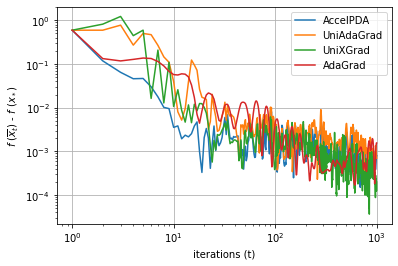

In [7]:
#Parameters
T = 1000
batch_size = int(n/10)
alpha = [i for i in range(T+2)]
t = [i+1 for i in range(T+1)]
x1 = np.random.rand(d)
eta = np.linalg.norm(grad(x1,range(n)) - grad(x1,random.sample(range(n), batch_size)))**2 / D_AccelPDA**2

#batches
batch = []
for i in range(T+1): batch.append(random.sample(range(n), batch_size))

# Running the algorithms
x_aver_AccelPDA, f_AccelPDA = AccelPDA(cost, grad, x0, T, d, batch, alpha, D_AccelPDA, L, eta, r)
x_aver_UniAdaGrad, f_UniAdaGrad = UniAdaGrad(cost, grad, x0, T, d, batch, alpha, r, R)
x_aver_AdaGrad, f_AdaGrad = AdaGrad(cost, grad, x0, T, d, batch, D_AdaGrad, r)
x_aver_UniXGrad, f_UniXGrad = UniXGrad(cost, grad, y0, T, d, batch, alpha, r, D_UniXGrad)

# Plotting
plt.loglog(t, f_AccelPDA - f_star, label='AccelPDA')
plt.loglog(t, f_UniAdaGrad - f_star, label='UniAdaGrad')
plt.loglog(t, f_UniXGrad - f_star, label='UniXGrad')
plt.loglog(t, f_AdaGrad - f_star, label='AdaGrad')
plt.xlabel('iterations (t)')
plt.ylabel('$f \ (\overline{x}_t)$ - $f \ (x_*)$')
#plt.title('m=n/10')
plt.legend()
plt.grid(True)
#plt.savefig('res/exp_2_2.pdf', format='pdf')